# Exploration of Loan Data from Prosper
## by Hyoson Yamanaka

## Preliminary Wrangling

- The dataset in this report contains 113,937 loans from the Prosper marketplace. It provides borrower and loan characteristics with 81 variables such as loan amount, interest rate, loan status, borrower income, employment status, credit history, etc.


- Prosper is a US-based peer-to-peer lending marketplace. Borrowers can request personal loans on Prosper and individual or institutional investors can fund anywhere from 2,000 to 35,000 USD per loan request. Investors can consider borrowers’ credit scores, ratings, and histories and the category of the loan. Prosper handles the servicing of the loan and collects and distributes borrower payments and interest back to the loan investors.
Source: https://en.wikipedia.org/wiki/Prosper_Marketplace


- Data source: https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv


- Explanation of the variables included in the dataset: 
https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing

In [39]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
# If data needs to be gathered first:
## import requests

# Downloading the image predictions file
## url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
## response = requests.get(url)

## with open('prosperLoanData.csv', mode='wb') as file:    
##         file.write(response.content)

In [3]:
df = pd.read_csv('prosperLoanData.csv')

In [4]:
# allow for more columns and rows to be displayed
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

# Overview of dataframe structure
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [5]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
# See summary statistics for the variables
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [7]:
# Check for any duplicated rows of data
sum(df.duplicated())

0

**Assessing and Cleaning the Dataset**

- Many of the provided variables are not of interest for the final analysis. For now they will remain in the dataframe in order to enable future analysis.

- There are many variables with a significant amount of Null values. These observations will also remain in the dataset as they offer information on other variables and _no data_ can also give insights on the loan or borrower performance. (For example: Maybe borrowers with no information on their employment status default more frequently)

- Loan origination date data will be transformed to datetime type in order to facilitate easier analysis with dates.

- Replace Income Range values: change _Non-employed_ to _0_ USD and _Not displayed_ to _ND_ (no data).

- Create a default flag variable that shows if a loan is/has been delinquent for 90+ days.

In [8]:
# Copy of original dataframe for cleaning steps
df_clean = df.copy()

In [9]:
# DateTime

# Convert LoanOriginationDate to datetime format
df_clean['LoanOriginationDate'] = pd.to_datetime(df_clean['LoanOriginationDate'], errors='coerce', yearfirst=True)

In [10]:
# Test
df_clean['LoanOriginationDate'].dtype

dtype('<M8[ns]')

In [11]:
# Defaults

# Define a default if the loan has been delinquent for 90 days or more
# the standard guideline used in most financial markets.
df_clean['DefaultFlag'] = df_clean['LoanCurrentDaysDelinquent'] >= 90

In [12]:
# Test
df_clean[['LoanCurrentDaysDelinquent', 'DefaultFlag']].sample(10)

,LoanCurrentDaysDelinquent,DefaultFlag
58513,519,True
67307,0,False
32322,0,False
110738,1791,True
66735,0,False
87247,0,False
74319,0,False
53398,1028,True
73702,0,False
12023,0,False


In [13]:
# Income Ranges

# Replace Non-employed with 0 USD and Not displayed to ND.
df_clean['IncomeRange'] = df_clean['IncomeRange'].replace('Not employed', '$0')
df_clean['IncomeRange'] = df_clean['IncomeRange'].replace('Not displayed', 'ND')

In [14]:
# Test
df_clean['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', 'ND', '$100,000+',
       '$75,000-99,999', '$1-24,999', '$0'], dtype=object)

### What is the structure of your dataset?

- The dataset has information on 113,937 loans and provides 81 attributes. For each loan we get information on the borrower and loan characteristics. 


### What is/are the main feature(s) of interest in your dataset?

- The borrower and loan characteristics for defaulted loans will be primarily analyzed in this study. The goal is to see if there are observable differences between the borrowers that defaulted and the ones that didn't.


- As a starting point a new default flag variable was coded based on the days the loan has been delinquent. Defaulted loans are classified as 90+ days delinquent.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Mainly the default falg and borrower/loan characteristics such as employment status, income, loan origination date and state.

## Univariate Exploration


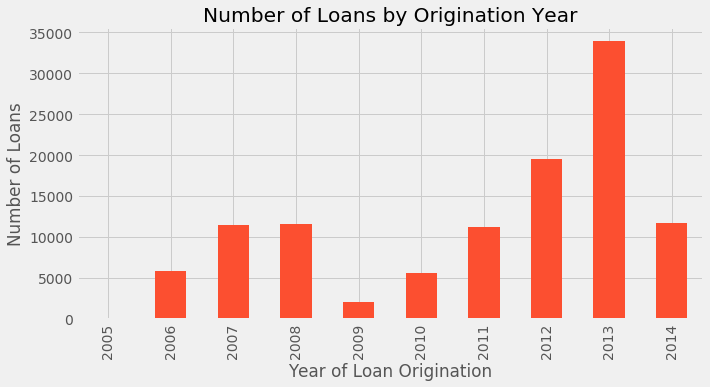

In [50]:
# Period coverage of data
coverage = df_clean.groupby(df_clean['LoanOriginationDate'].dt.year)['ListingNumber'].nunique()

# Bar chart
color = sb.color_palette()[1]

plt.figure(figsize=(10, 5))
coverage.plot(kind='bar', color=color);

plt.title('Number of Loans by Origination Year');
plt.xlabel('Year of Loan Origination');
plt.ylabel('Number of Loans');

**Loans by Origination Year**
- The highest amount of loans by year of origination / listing in the dataset are from 2012-2013.
- During 2009/10 the loan amount is significantly lower than the other years, suggesting a major impact of the financial crisis at the time on the volume of loans.


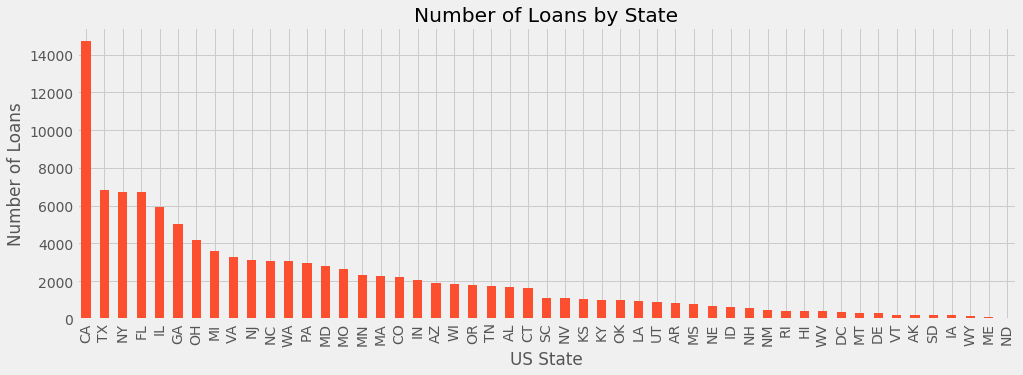

In [51]:
# Loans per regions/state
states = df_clean['BorrowerState'].value_counts()

# Bar chart
plt.figure(figsize=(15, 5))
states.plot(kind='bar', color=color);

plt.title('Number of Loans by State');
plt.xlabel('US State');
plt.ylabel('Number of Loans');

**Loans by State**
- California shows the largest number of loans by a siginifcant margin, with over 14,000 loans in the dataset coming from the state. The next three largest markets are Texas, New York and Florida, with less than half that number.
- This strong regional concentration is probably driven by the fact that Propser is a California-based operation, focusing on their "home-turf" to some degree.
- The market sizes can also be explained by the US population distribution, which roughly shows a similar ranking of the largest states.
- It would be interesting to see if Prosper was rolled out nationally from the start or over time expanded its markets. They might also have focused their advertising on key regions first.

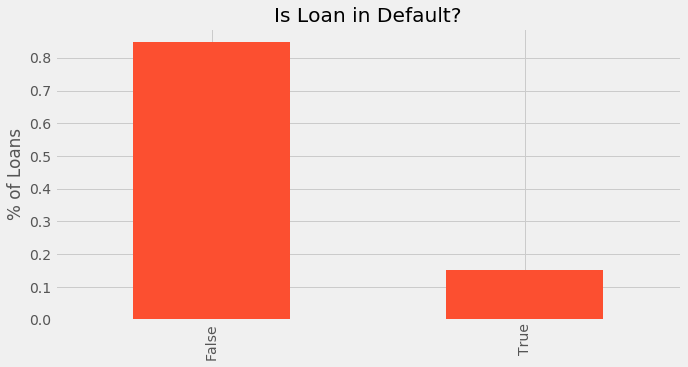

In [52]:
# Defaulted loans
# Percentage of loans in default
defaults = df_clean['DefaultFlag'].value_counts() / df_clean['DefaultFlag'].shape[0]

# Bar chart
plt.figure(figsize=(10, 5))
defaults.plot(kind='bar', color=color);

plt.title('Is Loan in Default?');
plt.ylabel('% of Loans');


**Defaulted Loans**
- Roughly 15% of loans in the dataset were/are in default when using the default definition of 90+ days in delinquencies. That is quite a high rate and warrants a closer look at what type of loans/borrowers are defaulting.

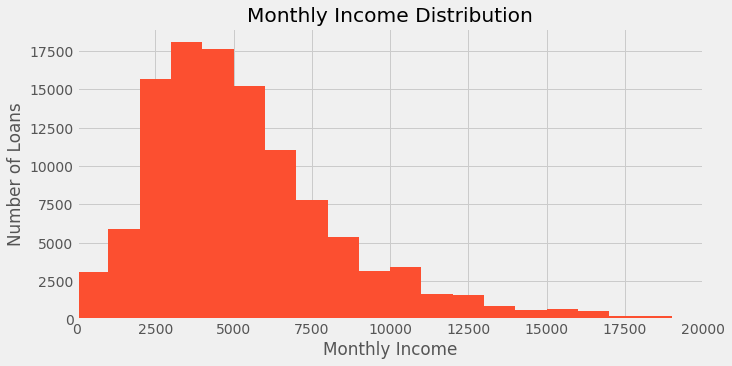

In [53]:
# Monthly Income
# Bar chart
plt.figure(figsize=(10, 5))

bin_edges = np.arange(0, df_clean['StatedMonthlyIncome'].max()+1000, 1000);

df_clean['StatedMonthlyIncome'].hist(bins = bin_edges, color=color);

plt.title('Monthly Income Distribution');
plt.xlabel('Monthly Income');
plt.ylabel('Number of Loans');
plt.xlim(0, 20000); # To limit the impact of outliers

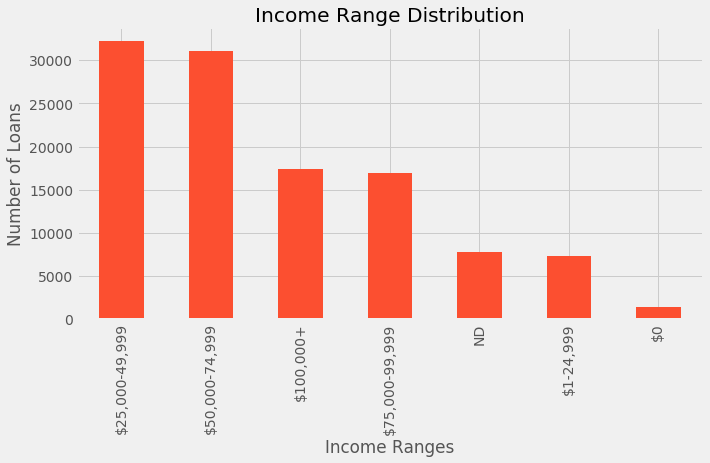

In [54]:
# Income ranges of the borrowers
income = df_clean['IncomeRange'].value_counts()

# Bar chart
plt.figure(figsize=(10, 5))
income.plot(kind='bar', color=color);

plt.title('Income Range Distribution');
plt.xlabel('Income Ranges');
plt.ylabel('Number of Loans');

**Income Ranges**
- Most borrowers have incomes between 25,000 to 75,000 USD. This is reflected both in the monthly income or in the income range column.
- There are some borrowers that don't report incomes and very few that are not epmloyed or have 0 USD reported income. Are these the ones more likely to be in the defaulted category?

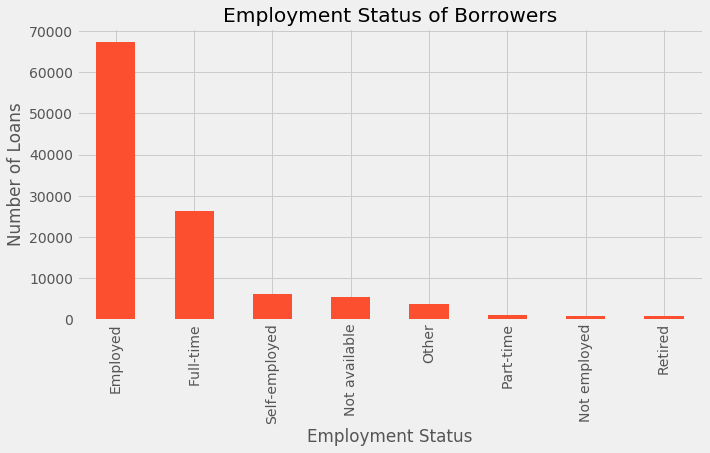

In [55]:
# Employment Status
employment = df_clean['EmploymentStatus'].value_counts()

# Bar chart
plt.figure(figsize=(10, 5))
employment.plot(kind='bar', color = color);

plt.title('Employment Status of Borrowers');
plt.xlabel('Employment Status');
plt.ylabel('Number of Loans');

**Employment Status**
- Most borrowers are reported as being employed or full-time working. 

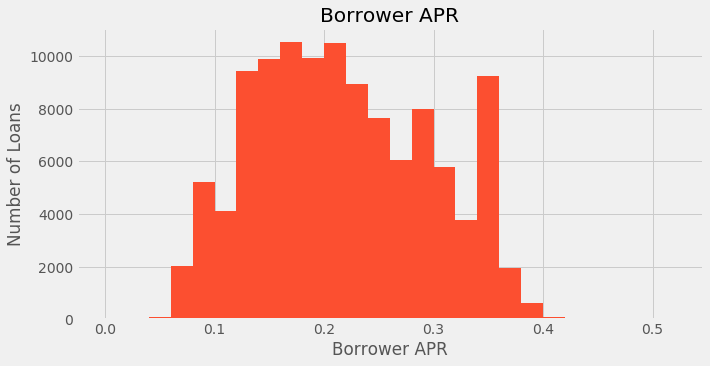

In [56]:
# Borrower APR
plt.figure(figsize=(10, 5))
bin_edges = np.arange(0, df_clean['BorrowerAPR'].max()+0.02, 0.02);
df_clean['BorrowerAPR'].hist(bins = bin_edges, color = color);

plt.title('Borrower APR');
plt.xlabel('Borrower APR');
plt.ylabel('Number of Loans');

**Borrower APR**
- Almost all borrowers pay an annual interest rate of 10 - 40%, with the majority concentrated around 20%.
- There is a large group of loans paying roughly 36% APR for some reason. This could be investigated in a future analysis.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Most variables (origination year, income range, state, employment status) showed a concentration around one or two characteristics. The monthly income column had some extreme outliers which where ignored in the chart by limiting the X-axis range.


- As there were no extreme points in the variables observed, no transaformations were necessary.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The distributions were all skewed towards a few characteristics. The majority of borrowers shows "normal" values, such as being employed and having an average income level.


- Adjustments to the data were only made in the cleaning phase. The listing date was transformed to the datetime format in order to extract the year value easily for the origination year chart. The income range categories were cleaned up a bit to reflect which borrowers have 0 USD income. Lastly, a default category was created based on the 90+ days in delinquency definition so that the underlying default flag is made clear.

## Bivariate Exploration


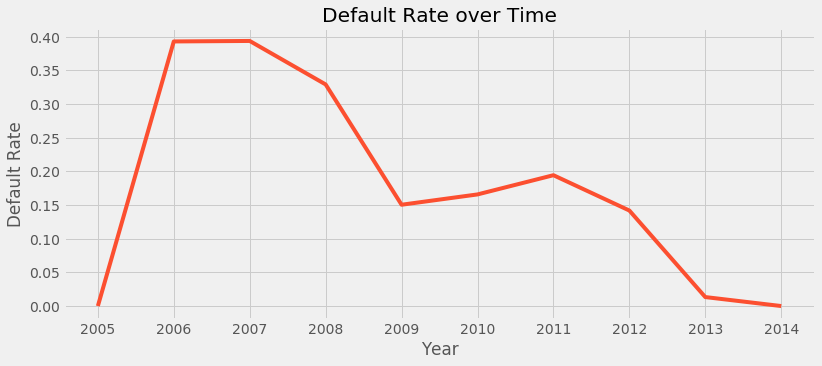

In [58]:
# Default rate over time

# Default rate by year
defaulted_loans = df_clean.groupby(df_clean['LoanOriginationDate'].dt.year)['DefaultFlag'].sum();
performing_loans = df_clean.groupby(df_clean['LoanOriginationDate'].dt.year)['ListingNumber'].count();

def_year = defaulted_loans / performing_loans;
def_year = def_year.reset_index();

# Chart
def_year.plot.line(x = 'LoanOriginationDate', y = 0, color = color, legend=False, figsize=(12, 5));

plt.xticks(np.arange(2005, 2014+1, 1))
plt.xlabel('Year');
plt.ylabel('Default Rate');
plt.title('Default Rate over Time');

**Default Rate over Time**
- The default rate is defined as defaulted loans divided by all loans in a given year.
- The default rate is highest for loans originated between 2006 - 2008, peaking at 40%. This means that almost half of all borrowers from 2006 and 2007 did not repay their loans (full or partially).
- Did the lending standards of investor get lowered during the peak years or was the economic impact of the following crises the main driver of the defaults?

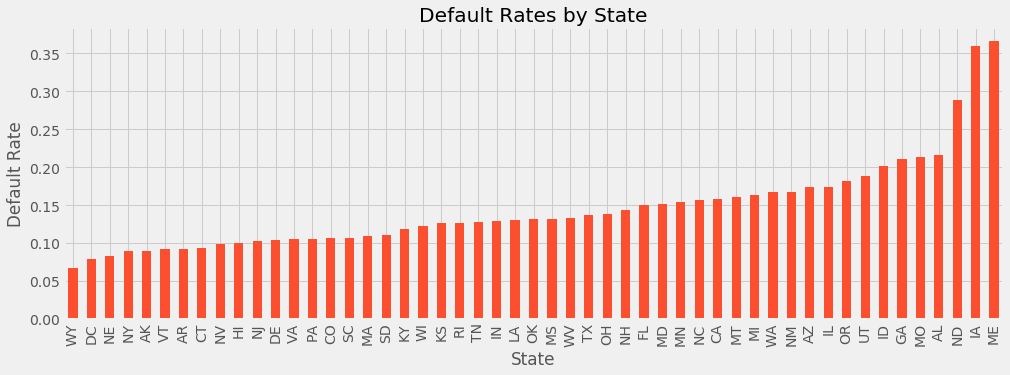

In [59]:
# Default rate by state
defaulted_loans = df_clean.groupby('BorrowerState')['DefaultFlag'].sum();
performing_loans = df_clean.groupby('BorrowerState')['ListingNumber'].count();

def_state = defaulted_loans / performing_loans
def_state.sort_values(inplace=True)

# Chart
plt.figure(figsize=(15, 5));
def_state.plot(kind = 'bar', color = color);

plt.xlabel('State');
plt.ylabel('Default Rate');
plt.title('Default Rates by State');

**Default Rates by States**
- The default rates vary quite significantly by state. The lowest rate is recorded in WY at around 6%. The highest default rates are observed in IA and ME, both above 35%.
- The states with highest loan amount (see previous section) are not particularily visible in this ranking.

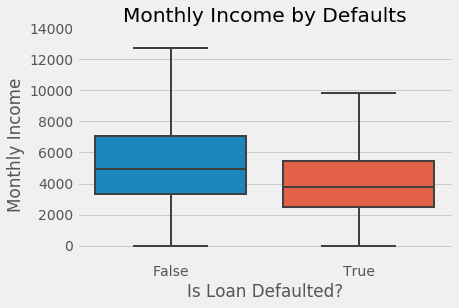

In [65]:
# Defaults by income
sb.boxplot(data=df_clean, x='DefaultFlag', y='StatedMonthlyIncome', showfliers=False, linewidth=2);

plt.title('Monthly Income by Defaults');
plt.xlabel('Is Loan Defaulted?');
plt.ylabel('Monthly Income');

plt.ylim(-1000, 14000);

**Monthly Income by Default Status**
- For this chart the outliers of the Boxplot where ignored to make the visual more appealing and because the outliers do not inform us about the "average" case or trends we are interestd in.
- The borrowers' monthly income is generally lower for loans that defaulted. This is the case for the maximum values and quartile ranges.
- This is already a interesting hint at the importance of the income on the default behavior.

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


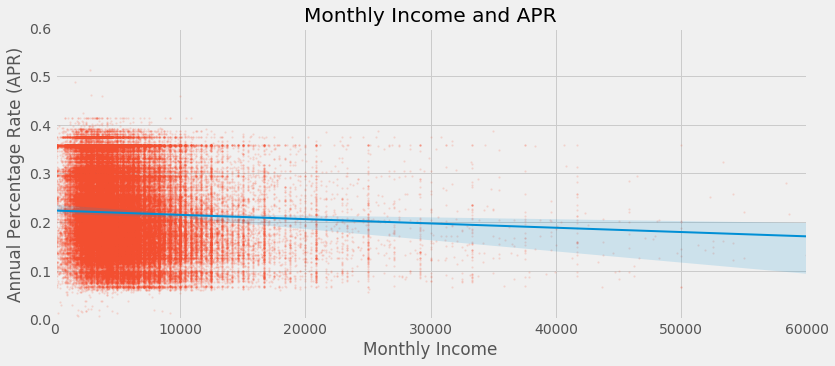

In [84]:
# APR and income
plt.figure(figsize=(12, 5));
sb.regplot(data = df_clean, x = 'StatedMonthlyIncome', y = 'BorrowerAPR',  
           scatter_kws={'color':color,'alpha':0.1,'s':2}, line_kws={"lw":2});
plt.xlim(0, 60000);
plt.ylim(0, 0.6);

plt.xlabel('Monthly Income');
plt.ylabel('Annual Percentage Rate (APR)');
plt.title('Monthly Income and APR');

**Income and Borrower APR**
- Monthly income limited to 60,000 USD to remove the extreme outliers.
- A slight downward trend is suggested by the regression line, but the amount of observations for high income individuals is quite low in comparison the the sub 20,000 USD monthly income categories. The result is a very high uncertainty at higher income levels.
- Maybe another component is better at explaining the APR levels?

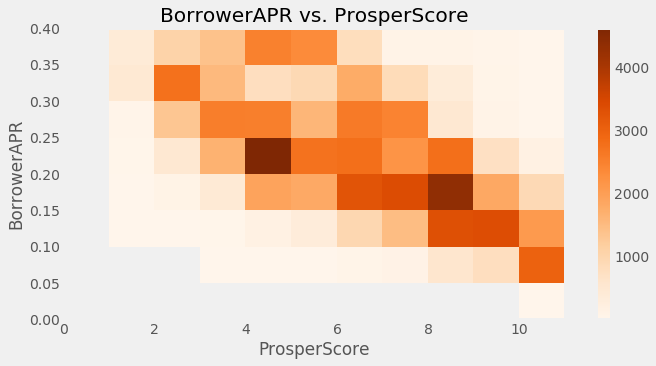

In [97]:
# Prosper score vs APR
bins_y = np.arange(0, df_clean['BorrowerAPR'].max()+0.05, 0.05)
bins_x = np.arange(0, df_clean['ProsperScore'].max()+1, 1)

plt.figure(figsize=(10, 5));
plt.hist2d(data = df_clean, x = 'ProsperScore', y = 'BorrowerAPR', bins = [bins_x, bins_y], 
               cmap = 'Oranges', cmin = 0.5)

plt.ylim(0,0.4)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');


**Prosper Score and Borrower APR**
- The Prosper Score reflects how the creditworthiness of a borrower is classified, with a higher number signifying a better standing.
- **Important**: The Prosper Score has only been applied since 2009, so we do loose a significant chunk of the information.
- We see a clear downward trend between APR and Prosper Score, suggesting that a higher score leads to a lower APR. This is much  clearer than the relationship between income and APR. The Prosper Score might be a prefered tool for investors because it gives a more holistic view on the borrower than just one variable such as income.

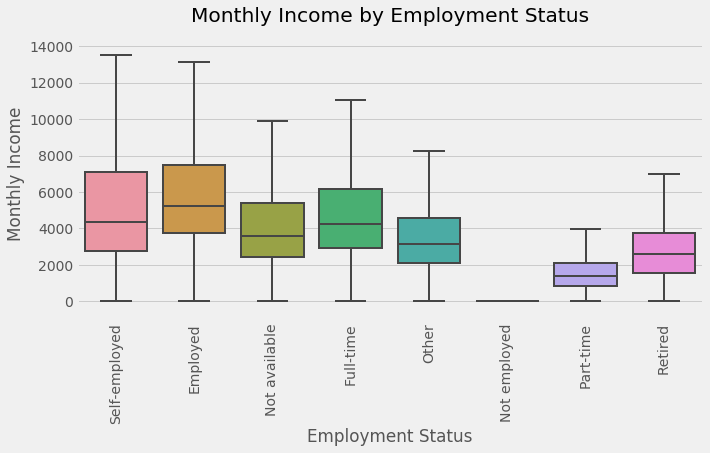

In [86]:
# Employment status and monthly income
plt.figure(figsize=(10, 5));
sb.boxplot(data = df_clean, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', showfliers=False, linewidth=2);

plt.title('Monthly Income by Employment Status');
plt.xlabel('Employment Status');
plt.ylabel('Monthly Income');

plt.ylim(-1000, 15000)
plt.xticks(rotation=90);

**Monthly Income by Employment Status**
- For this chart the outliers of the Boxplot where ignored to make the visual more appealing and because the outliers do not inform us about the "average" case or trends we are interestd in.
- Employed and self-employed borrowers have the highest monthly incomes, based on the inner quartile distribution.
- The lowest monthly incomes are recorded for the part-time, retired and other categories.
- Not employed shows the widest gap between the minimum and maximum values, but there are also not many observations in this category, so we should treat it carefully.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The default rate varied quite significantly over the years with clear peaks during the financial crisis. It does matter when a loan was originated.

> Certain states show a significantly higher default rate than others, suggesting that the regional characteristics are important.

> The monthly income for defaulted borrowers is generally lower than that for performing loans, based on the distribution characteristics. In a very simplistic way, one could conclude that poorer borrowers are also more likely to default on their loan.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The monthly income does not seem to matter too much for the APR, i.e. the interest the borrower has to pay on the loan. 

> Overall, employed and self-employed borrowers show the highest income levels.

## Multivariate Exploration

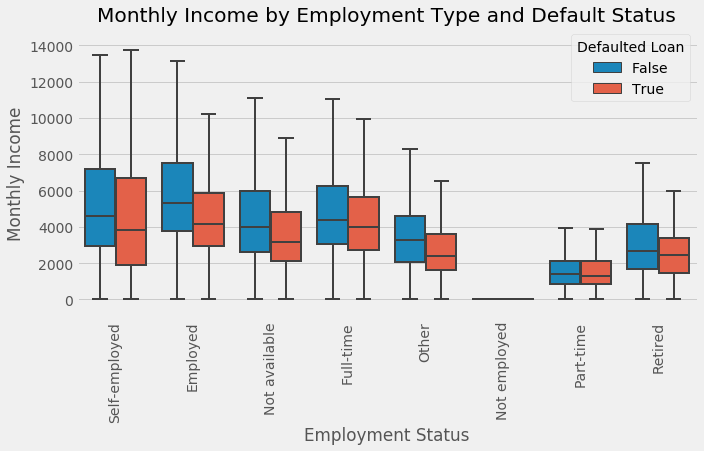

In [103]:
# Monthly income by employment type and defaults
sb.catplot(data = df_clean, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', 
           hue = 'DefaultFlag', kind="box", showfliers=False, height=5, aspect=2, linewidth=2, legend=False)

plt.ylim(-1000, 15000)
plt.xticks(rotation=90);
plt.legend(title="Defaulted Loan")
plt.title('Monthly Income by Employment Type and Default Status')
plt.xlabel('Employment Status')
plt.ylabel('Monthly Income');

**Monthly Income by Employment Status and Default Status**
- For this chart the outliers of the Boxplot where ignored to make the visual more appealing and because the outliers do not inform us about the "average" case or trends we are interestd in.
- Comparing the overall distribution of monthly incomes by employment type, it becomes clear that defaulted borrowers show lower income levels across almost all employment types. The only exception are part-time workers: for this group the income distribution looks to be fairly similar based on the quartile ranges.

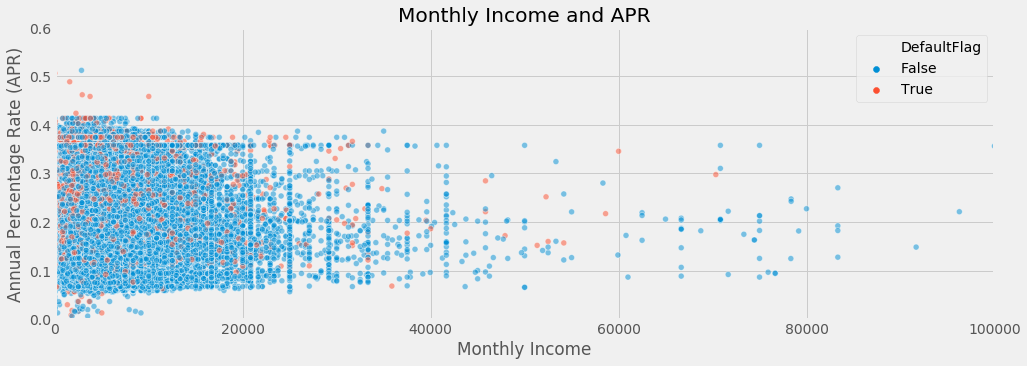

In [108]:
# APR and income and defaults
plt.figure(figsize=(15, 5));
sb.scatterplot(data = df_clean, x = 'StatedMonthlyIncome', y = 'BorrowerAPR', 
               hue = 'DefaultFlag', alpha=0.5);
plt.xlim(0, 100000);
plt.ylim(0, 0.6);

plt.xlabel('Monthly Income');
plt.ylabel('Annual Percentage Rate (APR)');
plt.title('Monthly Income and APR');

**APR vs Income with Default Flag**
- It appears that more defaults are concentrated on the top left corner of the chart (i.e. high APR and low income), but no obvious relationship of defaults can be gathered from this chart. The plot is not optimal to distinguish any meaningful pattern for defaults. 
- Maybe looking again at the Prosper Score instead of the Income might help more and using a different visualization.

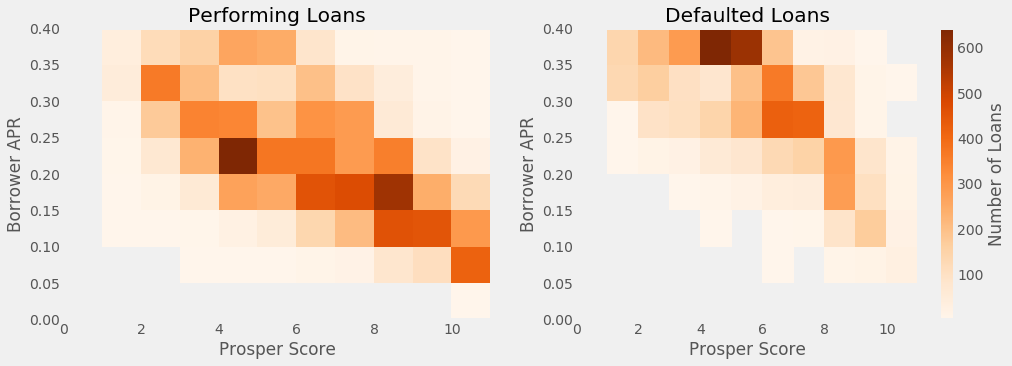

In [142]:
bins_y = np.arange(0, df_clean['BorrowerAPR'].max()+0.05, 0.05)
bins_x = np.arange(0, df_clean['ProsperScore'].max()+1, 1)

plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.hist2d(data = df_clean[df_clean['DefaultFlag'] == False], x = 'ProsperScore', y = 'BorrowerAPR', bins = [bins_x, bins_y], 
               cmap = 'Oranges', cmin = 0.5)

plt.ylim(0,0.4)
plt.title('Performing Loans')
plt.xlabel('Prosper Score')
plt.ylabel('Borrower APR');

plt.subplot(1, 2, 2)
plt.hist2d(data = df_clean[df_clean['DefaultFlag'] == True], x = 'ProsperScore', y = 'BorrowerAPR', bins = [bins_x, bins_y], 
               cmap = 'Oranges', cmin = 0.5)

plt.ylim(0,0.4)
plt.colorbar(label='Number of Loans')
plt.title('Defaulted Loans')
plt.xlabel('Prosper Score')
plt.ylabel('Borrower APR');

**APR vs Prosper Score with Default Flag**
- **Important**: The Prosper Score has only been applied since 2009, so we do loose a significant chunk of the information.
- The side-by-side comparison of APR and Prosper Score by default status is quite revealing. The main concentration of defaulted loans is in the category of high APR and low Prosper Score. 
- The reverse is true for performing loans in general. Here we see most loans have higher Prosper Scores and lower Borrower APR.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> When looking at the monthly income and employment type combinations between performing and defaulted loans it becomes clear that the defaulted borrowers are typically lower income across the board. This solidifies the link between income and defaults seen previously.

> As seen before, the look at APR in relation to monthly income or defaulted / non-defaulted loans is not very clear. But when looking at Prosper Score instead of Income, we see a clearer difference between defaulted and performing loans.

### Were there any interesting or surprising interactions between features?

> The fact that income does not seem related to defaults is interesting but might be explained by the fact that investors care about several borrower characteristics, not just one.